In [ ]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.autograd.variable import Variable
from torchvision.utils import save_image
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts a PIL Image or numpy.ndarray to tensor.
    transforms.Normalize((0.5,), (0.5,)) # Normalizes a tensor image with mean and standard deviation
])


train_dataset = datasets.MNIST(root='/content/drive/MyDrive/CSE/Sem 7/Sem 7/1. Advaced Machine Learning/Assignments/Programming Assignment/MNIST data set', train=True, transform=transform, download=True)

# Create a DataLoader to efficiently load data in batches and shuffle it to aid in training the neural network
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=True)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 34278531.70it/s]


Extracting /content/drive/MyDrive/CSE/Sem 7/Sem 7/1. Advaced Machine Learning/Assignments/Programming Assignment/MNIST data set/MNIST/raw/train-images-idx3-ubyte.gz to /content/drive/MyDrive/CSE/Sem 7/Sem 7/1. Advaced Machine Learning/Assignments/Programming Assignment/MNIST data set/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 7577137.29it/s]


Extracting /content/drive/MyDrive/CSE/Sem 7/Sem 7/1. Advaced Machine Learning/Assignments/Programming Assignment/MNIST data set/MNIST/raw/train-labels-idx1-ubyte.gz to /content/drive/MyDrive/CSE/Sem 7/Sem 7/1. Advaced Machine Learning/Assignments/Programming Assignment/MNIST data set/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9978806.10it/s]


Extracting /content/drive/MyDrive/CSE/Sem 7/Sem 7/1. Advaced Machine Learning/Assignments/Programming Assignment/MNIST data set/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/drive/MyDrive/CSE/Sem 7/Sem 7/1. Advaced Machine Learning/Assignments/Programming Assignment/MNIST data set/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2080887.90it/s]


Extracting /content/drive/MyDrive/CSE/Sem 7/Sem 7/1. Advaced Machine Learning/Assignments/Programming Assignment/MNIST data set/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/drive/MyDrive/CSE/Sem 7/Sem 7/1. Advaced Machine Learning/Assignments/Programming Assignment/MNIST data set/MNIST/raw



In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(100, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh()
        )

    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(784, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)


In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")


Using cpu device


In [ ]:
# Define the batch size
batch_size = 100


In [ ]:
generator = Generator().to(device)
discriminator = Discriminator().to(device)

g_optimizer = optim.Adam(generator.parameters(), lr=0.0002)
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)
num_epochs = 50
for epoch in range(num_epochs):
    print(epoch)
    for n, (real_samples, _) in enumerate(train_loader):
        # Train Discriminator
        real_samples_labels = torch.ones((batch_size, 1)).to(device)
        latent_space_samples = torch.randn((batch_size, 100)).to(device)
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1)).to(device)
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

        d_optimizer.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = nn.functional.binary_cross_entropy(output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        d_optimizer.step()

        # Train Generator
        latent_space_samples = torch.randn((batch_size, 100)).to(device)
        g_optimizer.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = nn.functional.binary_cross_entropy(output_discriminator_generated, real_samples_labels)
        loss_generator.backward()
        g_optimizer.step()

        # Logging
        if n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

        # Save models
        with open('G.pkl', 'wb') as f:
            pickle.dump(generator, f)
        with open('D.pkl', 'wb') as f:
            pickle.dump(discriminator, f)


0
Epoch: 0 Loss D.: 0.5693487524986267
Epoch: 0 Loss G.: 1.4709219932556152
1
Epoch: 1 Loss D.: 0.5250091552734375
Epoch: 1 Loss G.: 1.5400241613388062
2
Epoch: 2 Loss D.: 0.9150575399398804
Epoch: 2 Loss G.: 0.9392709136009216
3
Epoch: 3 Loss D.: 0.6207187175750732
Epoch: 3 Loss G.: 4.085377216339111
4
Epoch: 4 Loss D.: 0.6232852935791016
Epoch: 4 Loss G.: 1.4452990293502808
5
Epoch: 5 Loss D.: 0.26740220189094543
Epoch: 5 Loss G.: 2.8575611114501953
6
Epoch: 6 Loss D.: 0.1944236308336258
Epoch: 6 Loss G.: 3.005499839782715
7
Epoch: 7 Loss D.: 0.2958551347255707
Epoch: 7 Loss G.: 2.4022839069366455
8
Epoch: 8 Loss D.: 0.47537997364997864
Epoch: 8 Loss G.: 2.230144739151001
9
Epoch: 9 Loss D.: 0.44403326511383057
Epoch: 9 Loss G.: 2.2720203399658203
10
Epoch: 10 Loss D.: 0.2953353822231293
Epoch: 10 Loss G.: 2.1622016429901123
11
Epoch: 11 Loss D.: 0.4018942713737488
Epoch: 11 Loss G.: 2.2079267501831055
12
Epoch: 12 Loss D.: 0.3901647925376892
Epoch: 12 Loss G.: 2.170707941055298
13
E

In [ ]:
print("Test")

Test


In [ ]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import numpy as np

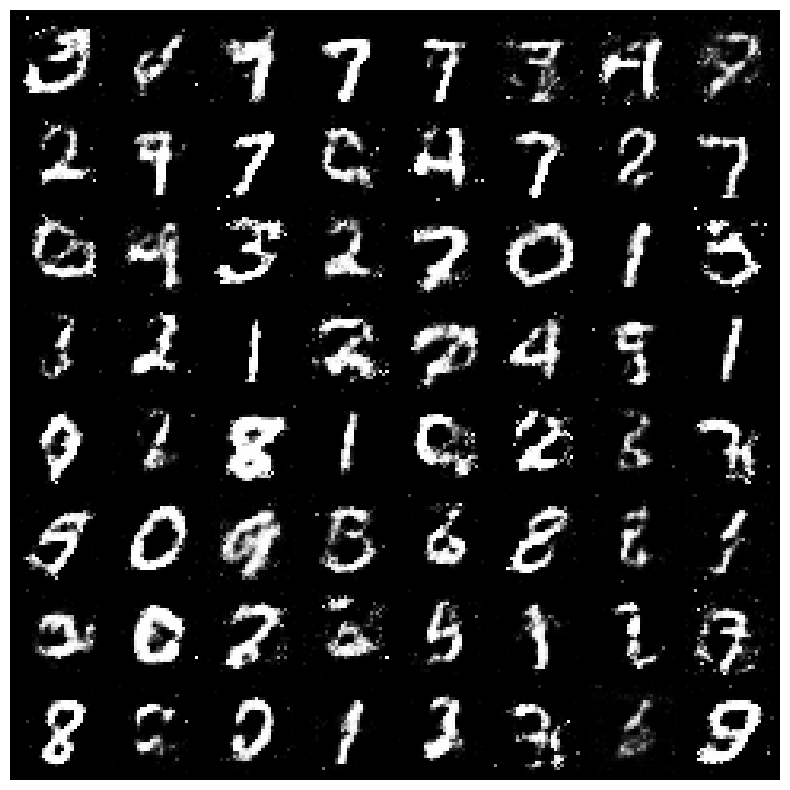

In [ ]:
generator.eval()

with torch.no_grad():  # No need to track gradients
    fixed_noise = torch.randn(64, 100, device=device)  # A fixed batch of noise vectors
    generated_images = generator(fixed_noise)
    img_grid = make_grid(generated_images, nrow=8, normalize=True)  # Create a grid of images

    # Convert to numpy and display
    plt.figure(figsize=(10, 10))
    plt.imshow(np.transpose(img_grid.cpu().numpy(), (1, 2, 0)), interpolation='nearest')
    plt.axis('off')
    plt.show()

    # Save the grid of images to a file
    plt.imsave('generated_images.png', np.transpose(img_grid.cpu().numpy(), (1, 2, 0)))


In [ ]:
import torch
import pickle

# Assuming the Generator and Discriminator classes are already defined in your environment

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the generator and discriminator
with open('/content/drive/MyDrive/CSE/Sem 7/Sem 7/1. Advaced Machine Learning/Assignments/Programming Assignment/Local/Generator.pkl', 'rb') as f:
    generator = pickle.load(f).to(device)



/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


In [ ]:

with open('D.pkl', 'rb') as f:
    discriminator = pickle.load(f).to(device)

In [ ]:
G = generator

In [ ]:
# Set the models to evaluation mode
generator.eval()


Generator(
  (main): Sequential(
    (0): Linear(in_features=100, out_features=6272, bias=True)
    (1): BatchNorm1d(6272, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Unflatten(dim=1, unflattened_size=(128, 7, 7))
    (4): ConvTranspose2d(128, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): ConvTranspose2d(128, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(128, 1, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (9): Tanh()
  )
)

In [ ]:
discriminator.eval()

Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1, bias=True)
    (10): Sigmoid()
  )
)

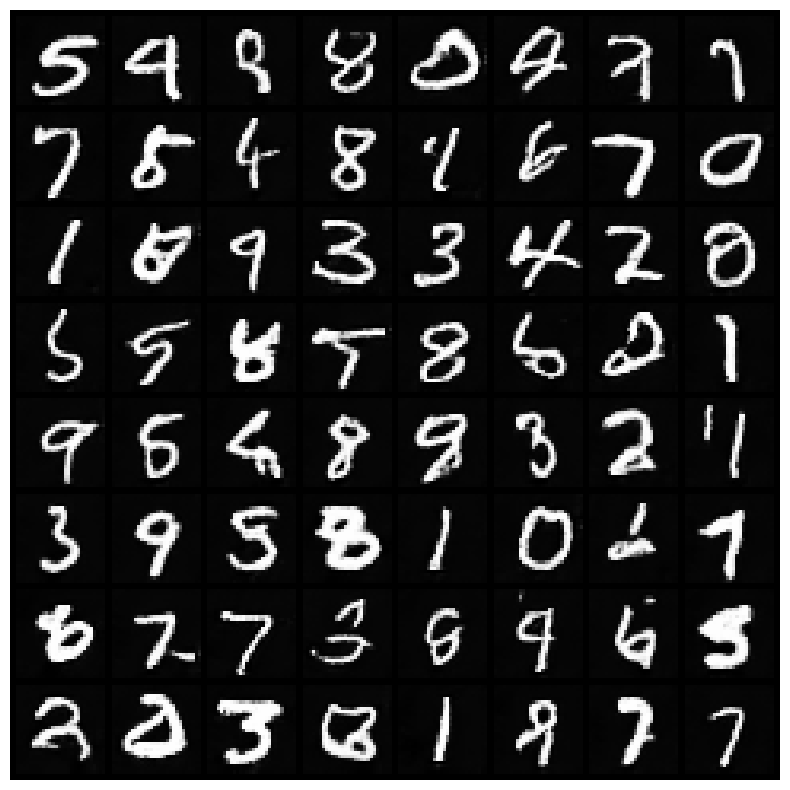

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import make_grid

# Create latent vectors to generate images
num_images = 64
latent_vectors = torch.randn(num_images, 100, device=device)  # Adjust '100' to match the input size of your generator

# Generate images
with torch.no_grad():
    generated_images = generator(latent_vectors)

# Convert generated images for visualization
generated_images = generated_images.detach().cpu()
img_grid = make_grid(generated_images, nrow=8, normalize=True)  # Adjust the nrow as needed

# Show images
plt.figure(figsize=(10, 10))
plt.imshow(np.transpose(img_grid.numpy(), (1, 2, 0)))
plt.axis('off')
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

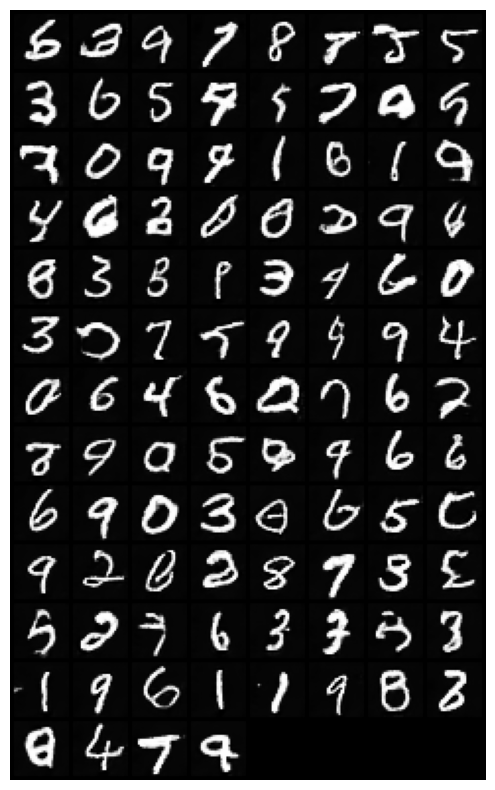

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import make_grid

# Create latent vectors to generate images
num_images = 100  # For example, generate 64 images
latent_vectors = torch.randn(num_images, 100, device=device)  # Adjust '100' to match the input size of your generator

# Generate images
with torch.no_grad():
    generated_images = generator(latent_vectors)

# Convert generated images for visualization
generated_images = generated_images.detach().cpu()
img_grid = make_grid(generated_images, nrow=8, normalize=True)  # Adjust the nrow as needed

# Show images
plt.figure(figsize=(10, 10))
plt.imshow(np.transpose(img_grid.numpy(), (1, 2, 0)))
plt.axis('off')
plt.show()


***2. Create and annotate a fake data set ***

In [ ]:
import os

# Define the base path in Google Drive
base_path = '/content/drive/MyDrive/CSE/Sem 7/Sem 7/1. Advaced Machine Learning/Assignments/Programming Assignment/Fake_Digits1'
os.makedirs(base_path, exist_ok=True)  # Create the directory if it does not exist


In [ ]:
import torch
from torchvision.utils import save_image

for i in range(100):
    with torch.no_grad():
        # Generate a single latent vector z
        z = torch.randn(1, 100, device=device)
        # Generate the fake image from z
        fake_image = generator(z)

        # Define file paths for saving the images and latent vectors
        image_path = f'{base_path}/{i:03d}.png'
        latent_path = f'{base_path}/{i:03d}.txt'

        # Save the generated image
        save_image(fake_image, image_path, normalize=True)

        # Convert z to a numpy array, flatten it and format it as a string enclosed in square brackets
        z_flattened = z.cpu().numpy().flatten()
        z_string = "[" + ", ".join(f"{num:.8f}" for num in z_flattened) + "]"

        # Save the formatted string to a text file
        with open(latent_path, 'w') as file:
            file.write(z_string)

print("Images and latent vectors have been saved to Google Drive.")


Images and latent vectors have been saved to Google Drive.


Hand Pick

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import os
import pickle
from PIL import Image
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

In [ ]:
nz=100

In [ ]:
def save_image_and_vector(label, index, image, latent_vector):
    os.makedirs(f"{save_path}/{label}", exist_ok=True)
    Image.fromarray(image).save(f"{save_path}/{label}/{index}.png")

    latent_vector_str = np.array2string(latent_vector, separator=',', formatter={'float_kind': lambda x: "%.8f" % x})
    latent_vector_str = latent_vector_str.replace('\n', '')
    with open(f"{save_path}/{label}/{index}.txt", "w") as f:
        f.write(latent_vector_str)

def on_button_clicked(label):
    global latent_vector, current_image, index
    save_image_and_vector(label, index, current_image, latent_vector)
    index += 1
    with output:
        clear_output(wait=True)
        print(f"Saved as {save_path}/{label}/{index}.png and {save_path}/{label}/{index}.txt")
    display_next_image()

def on_skip_clicked(b):
    with output:
        clear_output(wait=True)
        print("Skipping saving.")
    display_next_image()


# Display the next image to classify
def display_next_image():
    global current_image, latent_vector
    with torch.no_grad():
        noise = torch.randn(1, nz, device=device)  # Generate random noise
        latent_vector = noise.cpu().numpy().flatten()  # Flatten latent vector for saving

        # Generate the fake image
        generated_image = G(noise).detach().cpu().squeeze(0)  # Remove batch dimension

        # Process the generated image to be in the correct shape and format for imshow
        generated_image = generated_image.mul(127.5).add(127.5).clamp(0, 255).byte().numpy()  # Convert to [0, 255] range

        # Extract the first channel if it is not already in 2D shape (28, 28)
        current_image = generated_image[0, :, :] if generated_image.ndim == 3 else generated_image

        # Display the image using matplotlib
        with output:
            clear_output(wait=True)
            plt.imshow(current_image, cmap='gray')
            plt.axis('off')
            plt.show()


for i, button in enumerate(buttons):
    button.on_click(lambda b, i=i: on_button_clicked(str(i)))
skip_button.on_click(on_skip_clicked)

display_next_image()


In [ ]:

buttons = [widgets.Button(description=str(i)) for i in range(10)]
skip_button = widgets.Button(description="Skip")
output = widgets.Output()

button_grid = widgets.GridBox(
    buttons + [skip_button],
    layout=widgets.Layout(
        grid_template_columns="repeat(5, 100px)",  # 5 buttons per row
        grid_gap="10px 10px",
        justify_content="center"
    )
)

display(button_grid, output)
index = 0

save_path = "/content/drive/MyDrive/CSE/Sem 7/Sem 7/1. Advaced Machine Learning/Assignments/Programming Assignment/Fake_Digits_HandPick"

os.makedirs(save_path, exist_ok=True)

GridBox(children=(Button(description='0', style=ButtonStyle()), Button(description='1', style=ButtonStyle()), …

Output()

**3. Evaluate the new fake data set**